In [248]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

import matplotlib.pyplot as plt

In [249]:
PATH = os.path.dirname(os.getcwd())
data_path = PATH +'\\LAB 3\\Data'

# Explore dataset

In [250]:
data = pd.read_csv(data_path + '\\dataR2.csv')

data.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [251]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [252]:
data.groupby("Classification").count()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
1,52,52,52,52,52,52,52,52,52
2,64,64,64,64,64,64,64,64,64


In [253]:
data.shape

(116, 10)

In [254]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

When we are looking for the best algorithm to classify a dataset, it is very useful to compare all of them. Besides, to protect the training from **overfitting** and calculate the performance with less variance than a single train-test split, it is uselful to apply **K-Fold cross-validation**. The way that KFolds works is splitting the dataset into k-parts or **fold** (e.g. k = 3, 5 or k = 10). The algorithm is trained on k − 1 folds with one held back and tested on the held back fold.

In [255]:

#Models definition
models=[]
models.append(('SVM_linear', SVC()))
models.append(('SVM_Poly', SVC(kernel='poly')))
models.append(('Naive_Bayes', GaussianNB()))
models.append(('Decision_trees', DecisionTreeClassifier()))
models.append(('Logistic_Regression', LogisticRegression(solver='liblinear')))
models.append(('Artificial Neural Network', MLPClassifier(solver='adam', alpha=0.001)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=8)))
models.append(("Bagging", RandomForestClassifier()))

In [256]:
#Evaluate each model
names=[]
scoring_metric=['accuracy', 'precision', 'recall', 'f1']
models_names = [models[i][0] for i in range(len(models))]
results_df=pd.DataFrame(data={scoring_metric[0] : np.zeros(len(models_names))}, 
                        columns=scoring_metric)
results_df.index = models_names
for metric in scoring_metric:
    for name_model, model in models:
  
        kf = KFold(n_splits=10, shuffle=True)
        cv_results = cross_val_score(model, X, y, cv=kf, scoring=metric).mean()
        results_df.loc[name_model, metric] = cv_results
results_df.to_csv("results.csv")

# Improving Accuracies


### Wrapper method

In [258]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [259]:
# remove columns with a correlation > 0.7
correlated_features = set()
correlation_matrix = data.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)


In [260]:
print('We remove ', correlated_features, 'because correlation is > 0.7')

We remove  {'HOMA'} because correlation is > 0.7


In [261]:
# select most optimal features


feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=4,
           forward=False,
           verbose=2,
           scoring='roc_auc',
           cv=10)
# now that we have our feature selector, we need to call fit and pass itto our sets
features = feature_selector.fit(np.array(X), y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   34.0s finished

[2021-05-25 20:56:14] Features: 8/4 -- score: 0.8151984126984126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   21.7s finished

[2021-05-25 20:56:36] Features: 7/4 -- score: 0.840873015873016[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   18.6s finished

[2021-05-25 20:56:54] Features: 6/4 -- score: 0.8571031746031746[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [262]:
filtered_features= X.columns[list(features.k_feature_idx_)]
filtered_features

Index(['Age', 'BMI', 'Glucose', 'Resistin'], dtype='object')

In [263]:
X = data[filtered_features]

In [264]:
#Evaluate each model
names=[]
scoring_metric=['accuracy', 'precision', 'recall', 'f1']
models_names = [models[i][0] for i in range(len(models))]
results_df=pd.DataFrame(data={scoring_metric[0] : np.zeros(len(models_names))}, 
                        columns=scoring_metric)
results_df.index = models_names
for metric in scoring_metric:
    for name_model, model in models:
  
        kf = KFold(n_splits=10, shuffle=True)
        cv_results = cross_val_score(model, X, y, cv=kf, scoring=metric).mean()
        results_df.loc[name_model, metric] = cv_results


In [265]:

results_df.to_csv("results_improved.csv")

### PCA

In [267]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

x = np.array(X)
pca = PCA(n_components=9)
pca.fit(x)
explained_variance = pca.explained_variance_ratio_
explained_variance



array([9.88347351e-01, 5.20381748e-03, 2.45224228e-03, 1.95856348e-03,
       9.95367746e-04, 5.84338002e-04, 3.44377706e-04, 1.08400712e-04,
       5.54200345e-06])

In [268]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
pca2 = PCA(n_components=2)
X = pca2.fit_transform(x)

In [269]:

#Evaluate each model
names=[]
scoring_metric=['accuracy', 'precision', 'recall', 'f1']
models_names = [models[i][0] for i in range(len(models))]
results_df=pd.DataFrame(data={scoring_metric[0] : np.zeros(len(models_names))}, 
                        columns=scoring_metric)
results_df.index = models_names
for metric in scoring_metric:
    for name_model, model in models:
  
        kf = KFold(n_splits=10, shuffle=True)
        cv_results = cross_val_score(model, X, y, cv=kf, scoring=metric).mean()
        results_df.loc[name_model, metric] = cv_results


In [270]:
results_df.to_csv("results_pca.csv")

In [286]:
#Evaluate each models.
results=[]
names=[]
y = data.iloc[:, -1]

nfeatures = len(data.columns) - 1 
empty_data = { data.columns[0] : np.zeros(len(models_names))}
cci_df = pd.DataFrame(data= empty_data,
                      columns=data.columns[:-1])

cci_df.index = models_names

cci_df.head()

feature_list = data.columns[:-1]

for feature in range(nfeatures):
    X = data.iloc[:, feature].to_frame()
    for name_model, model in models:
        kf = KFold(n_splits=10, shuffle=True)
        cv_results= cross_val_score(model, X, y,
                                    cv=kf, scoring=metric).mean()
        cci_df.loc[name_model, feature_list[feature]] = cv_results

 

In [287]:
cci_df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
SVM_linear,0.560779,0.313016,0.627695,0.645124,0.643183,0.05,0.0,0.594886,0.018182
SVM_Poly,0.145022,0.273268,0.680526,0.150549,0.594048,0.0,0.0,0.066667,0.0
Naive_Bayes,0.454127,0.304221,0.645223,0.62777,0.643709,0.018182,0.180238,0.536892,0.375721
Decision_trees,0.540464,0.419845,0.55899,0.358297,0.396418,0.352947,0.473989,0.508571,0.427576
Logistic_Regression,0.000000,0.115476,0.467814,0.564415,0.574423,0.0,0.028571,0.451082,0.12381
Artificial Neural Network,0.214318,0.042857,0.066667,0.126667,0.56833,0.1,0.074208,0.233205,0.231145
KNN,0.613838,0.456427,0.63991,0.531987,0.586234,0.440482,0.406327,0.593837,0.391522
Bagging,0.488665,0.319597,0.518826,0.375114,0.421371,0.467316,0.504794,0.530165,0.403045


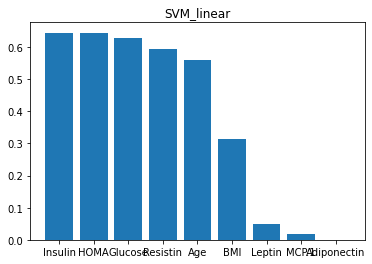

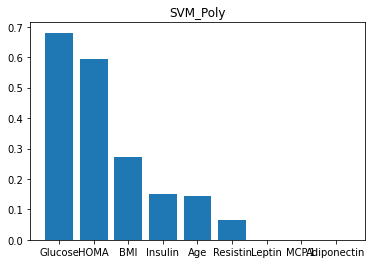

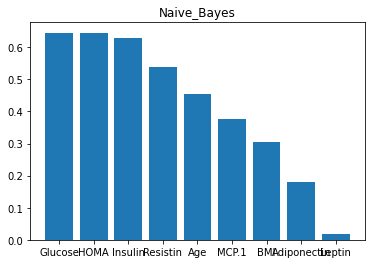

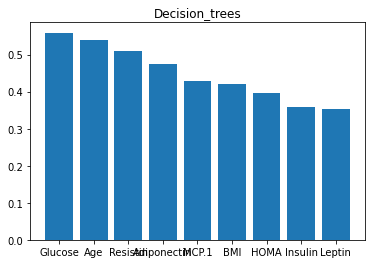

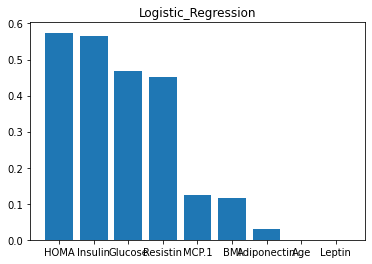

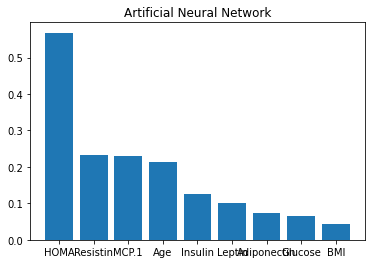

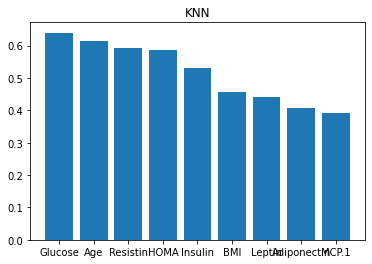

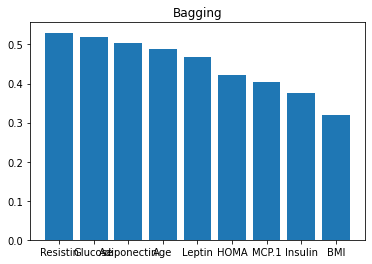

<Figure size 432x288 with 0 Axes>

In [293]:
cci_df = cci_df.T
for model in models_names:
    cci_df.sort_values(by=[model],
                        inplace=True, 
                        ascending=False)
    plt.bar(cci_df.index, cci_df[model])
    plt.title(model)
    plt.show() 
    plt.savefig(model+".jpg")